In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
%matplotlib inline

from scipy import integrate
from scipy.integrate import odeint
from numpy import exp
from scipy import stats

# Modeling of carbon cycle

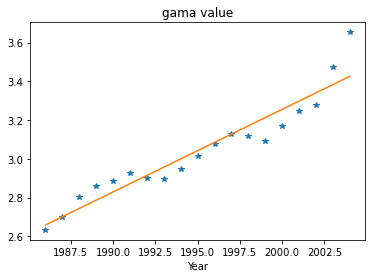

In [34]:
## read the data of co2 from fossil burning 
co2_data=pd.read_csv("global.1751_2008.csv",usecols=[0,1])
co2_data=co2_data.loc[(co2_data["Year"]>1985)& (co2_data["Year"]<2005)]


## covert this data to ppm 
co2_data["total emissions(ppm)"]=co2_data["Total carbon emissions from fossil-fuels (million metric tons of C)"]/1000/2.13

## set gama value by linear regresssion and define gama() function 
time=co2_data["Year"]
gamma= co2_data["total emissions(ppm)"]
gama_value=stats.linregress(time,gamma)
def gama(time):
    gama_result=gama_value.slope*time+gama_value.intercept
    return gama_result
## show the linear result
plt.plot(time,gamma,"*")
plt.plot(time,gama_value.slope*time+gama_value.intercept)
plt.title("gama value")
plt.xlabel("Year")
plt.show()

In [4]:
## read the data of co2 from globe earth 
total_co2=pd.read_csv("co2_annmean_mlo.csv",skiprows=55)
total_co2=total_co2.loc[(total_co2["year"]>1985) & (total_co2["year"] < 2005)]
total_co2

,year,mean,unc
27,1986,347.61,0.12
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12
32,1991,355.70,0.12
33,1992,356.54,0.12
34,1993,357.21,0.12
35,1994,358.96,0.12
36,1995,360.97,0.12


## 1.1 following 1-2 equation to build a two-box model.
    which is without buffer effect

In [93]:

# complete the no buffer model
def TwoBoxModel_one(f,t,k12,k21):
    N1,N2=f
    dfdt=[-k12*N1+k21*N2+gama(t),k12*N1-k21*N2]
    return dfdt
# use the given value for the equation
t=np.arange(1985,2004)
k12=105/740
k21=102/900
# intial condition
f0=[740/2.31,900/2.13]

# set the equation and sovle it
f_1= integrate.odeint(TwoBoxModel_one,f0,t,args=(k12,k21))
f_1[:,0]

array([320.34632035, 324.95918992, 328.83664038, 332.1485823 ,
       335.02667461, 337.57290553, 339.86629213, 341.96806654,
       343.92563648, 345.77575675, 347.54689528, 349.26110681,
       350.9354794 , 352.58325072, 354.21467589, 355.83770193,
       357.45848441, 359.08179272, 360.71132198])

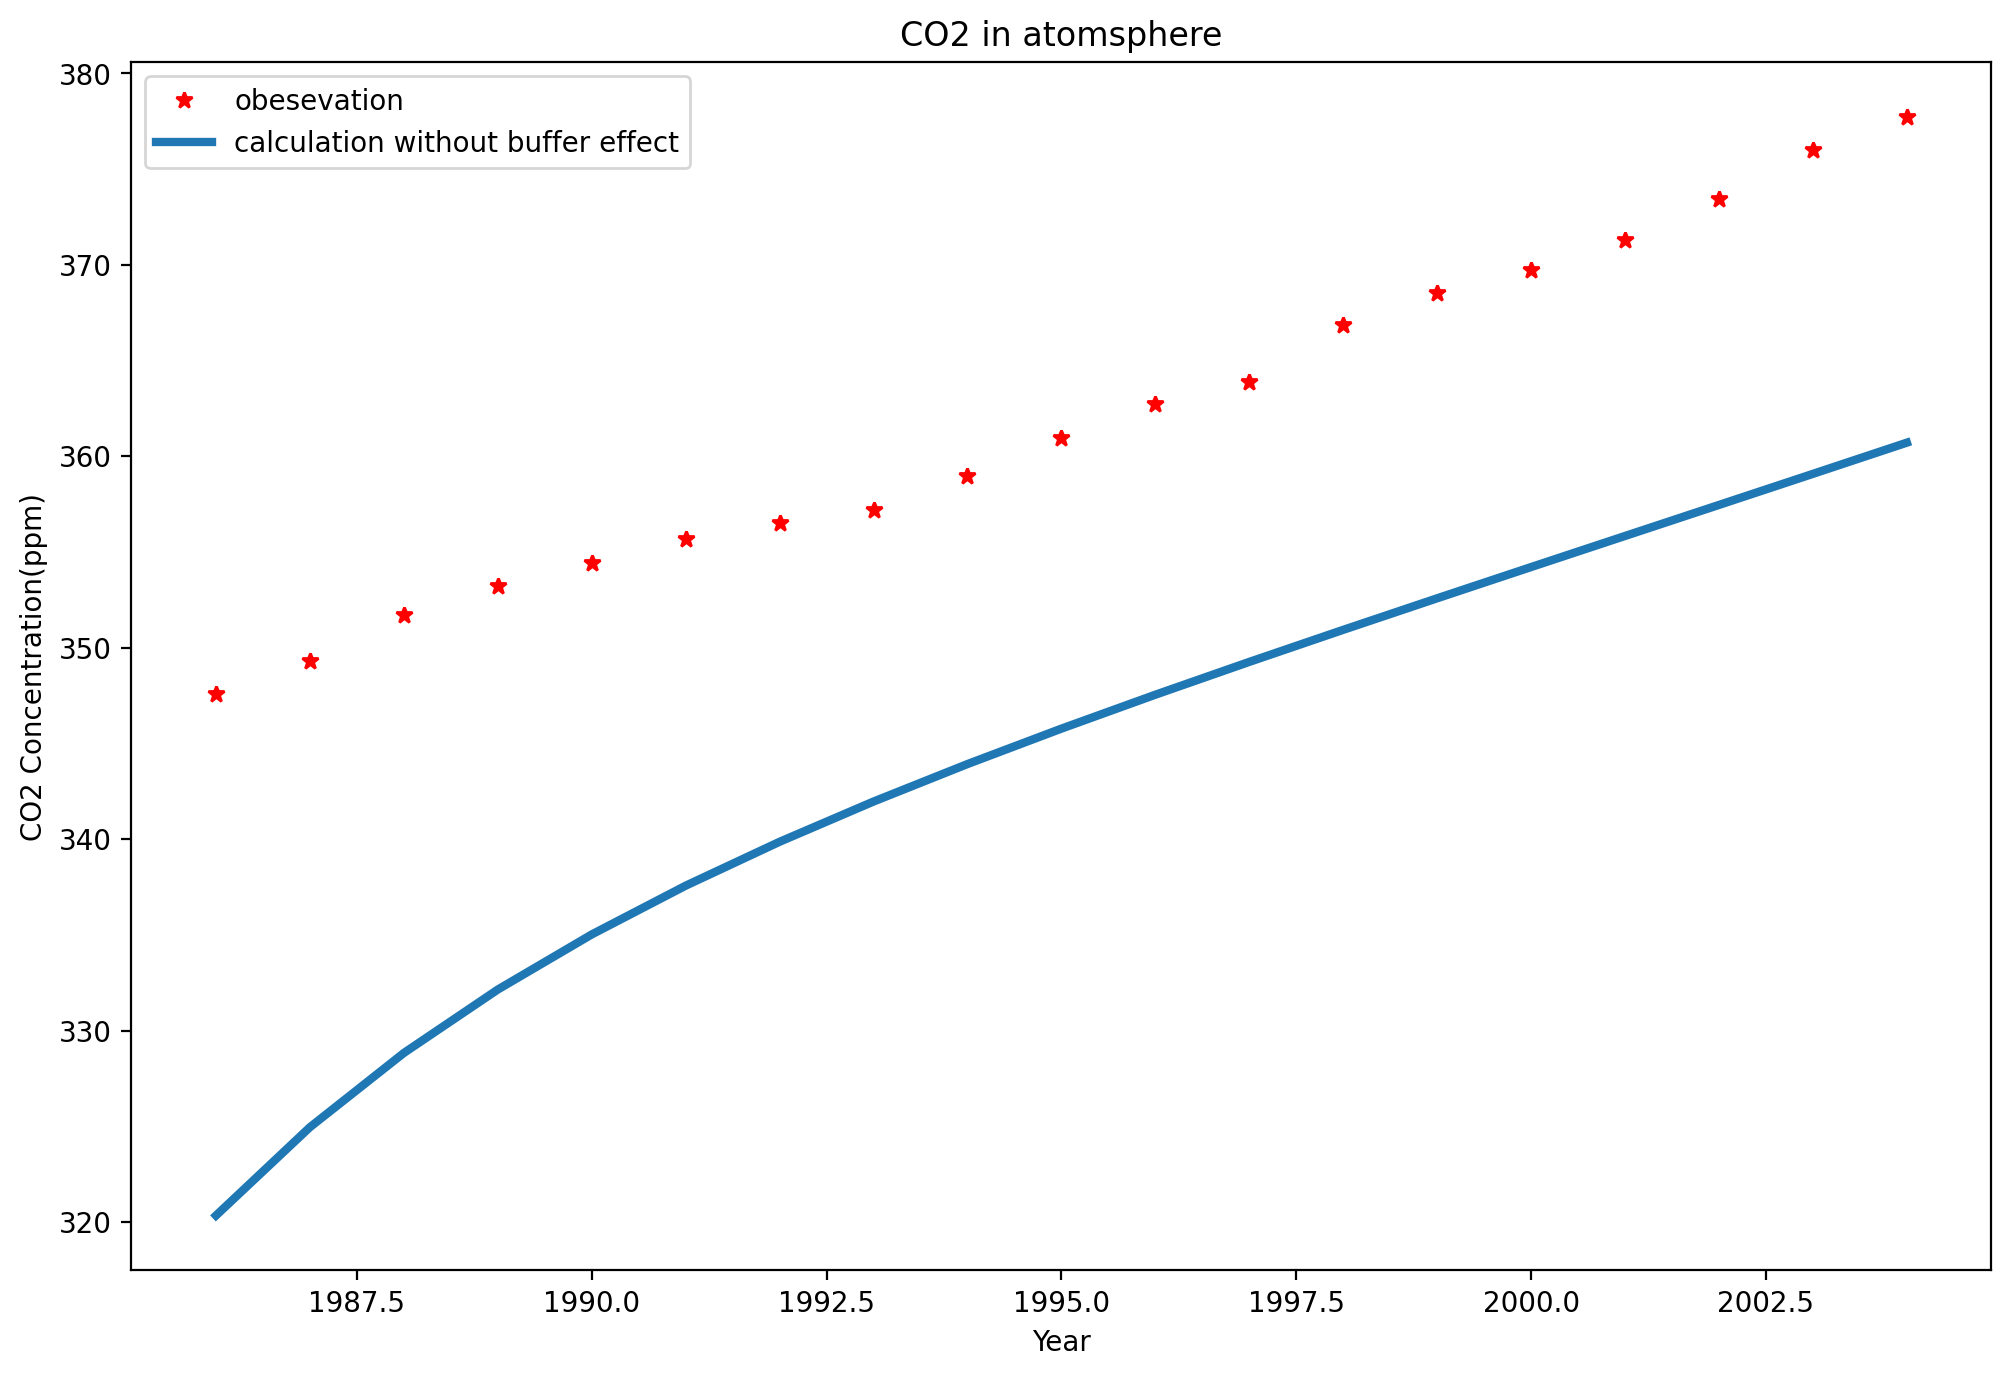

In [94]:
## Plot the results
plt.figure(figsize=(12,8),dpi=200)
plt.plot(total_co2["year"],total_co2["mean"],"r*",label="obesevation")
plt.plot(total_co2["year"],f_1[:,0],label="calculation without buffer effect",linewidth=3)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration(ppm)")
plt.legend(loc=2)
plt.title("CO2 in atomsphere")
plt.show()

## 1.2 Following 3-4 equation 
 indicating buffering infulence
 

In [95]:
# use the given value for the equation
t=np.arange(1985,2004)
k12=105/740
k21=102/900
N20=821/2.13
# intial condition
f0=[740/2.31,900/2.13]
# Define the function with buffer effect
def TwoBoxModel_two(f,t,k12,k21):
    N1,N2=f
    kexi=3.69+1.86*(10**-2)*N1-1.8*(10**-6)*(N1)**2
    dfdt=[-k12*N1+k21*(N20+kexi*(N2-N20))+gama(t),k12*N1-k21*(N20+kexi*(N2-N20))]
    return dfdt
# solve the equation 
f_2=odeint(TwoBoxModel_two,f0,t,args=(k12,k21))
f_2[:,0]


array([320.34632035, 345.23753352, 354.29047624, 358.62654144,
       361.64348401, 364.31868769, 366.92777227, 369.54783054,
       372.20034361, 374.89130786, 377.62242688, 380.39422288,
       383.2068875 , 386.06052631, 388.95522051, 391.8910426 ,
       394.86806286, 397.88635043, 400.94597397])

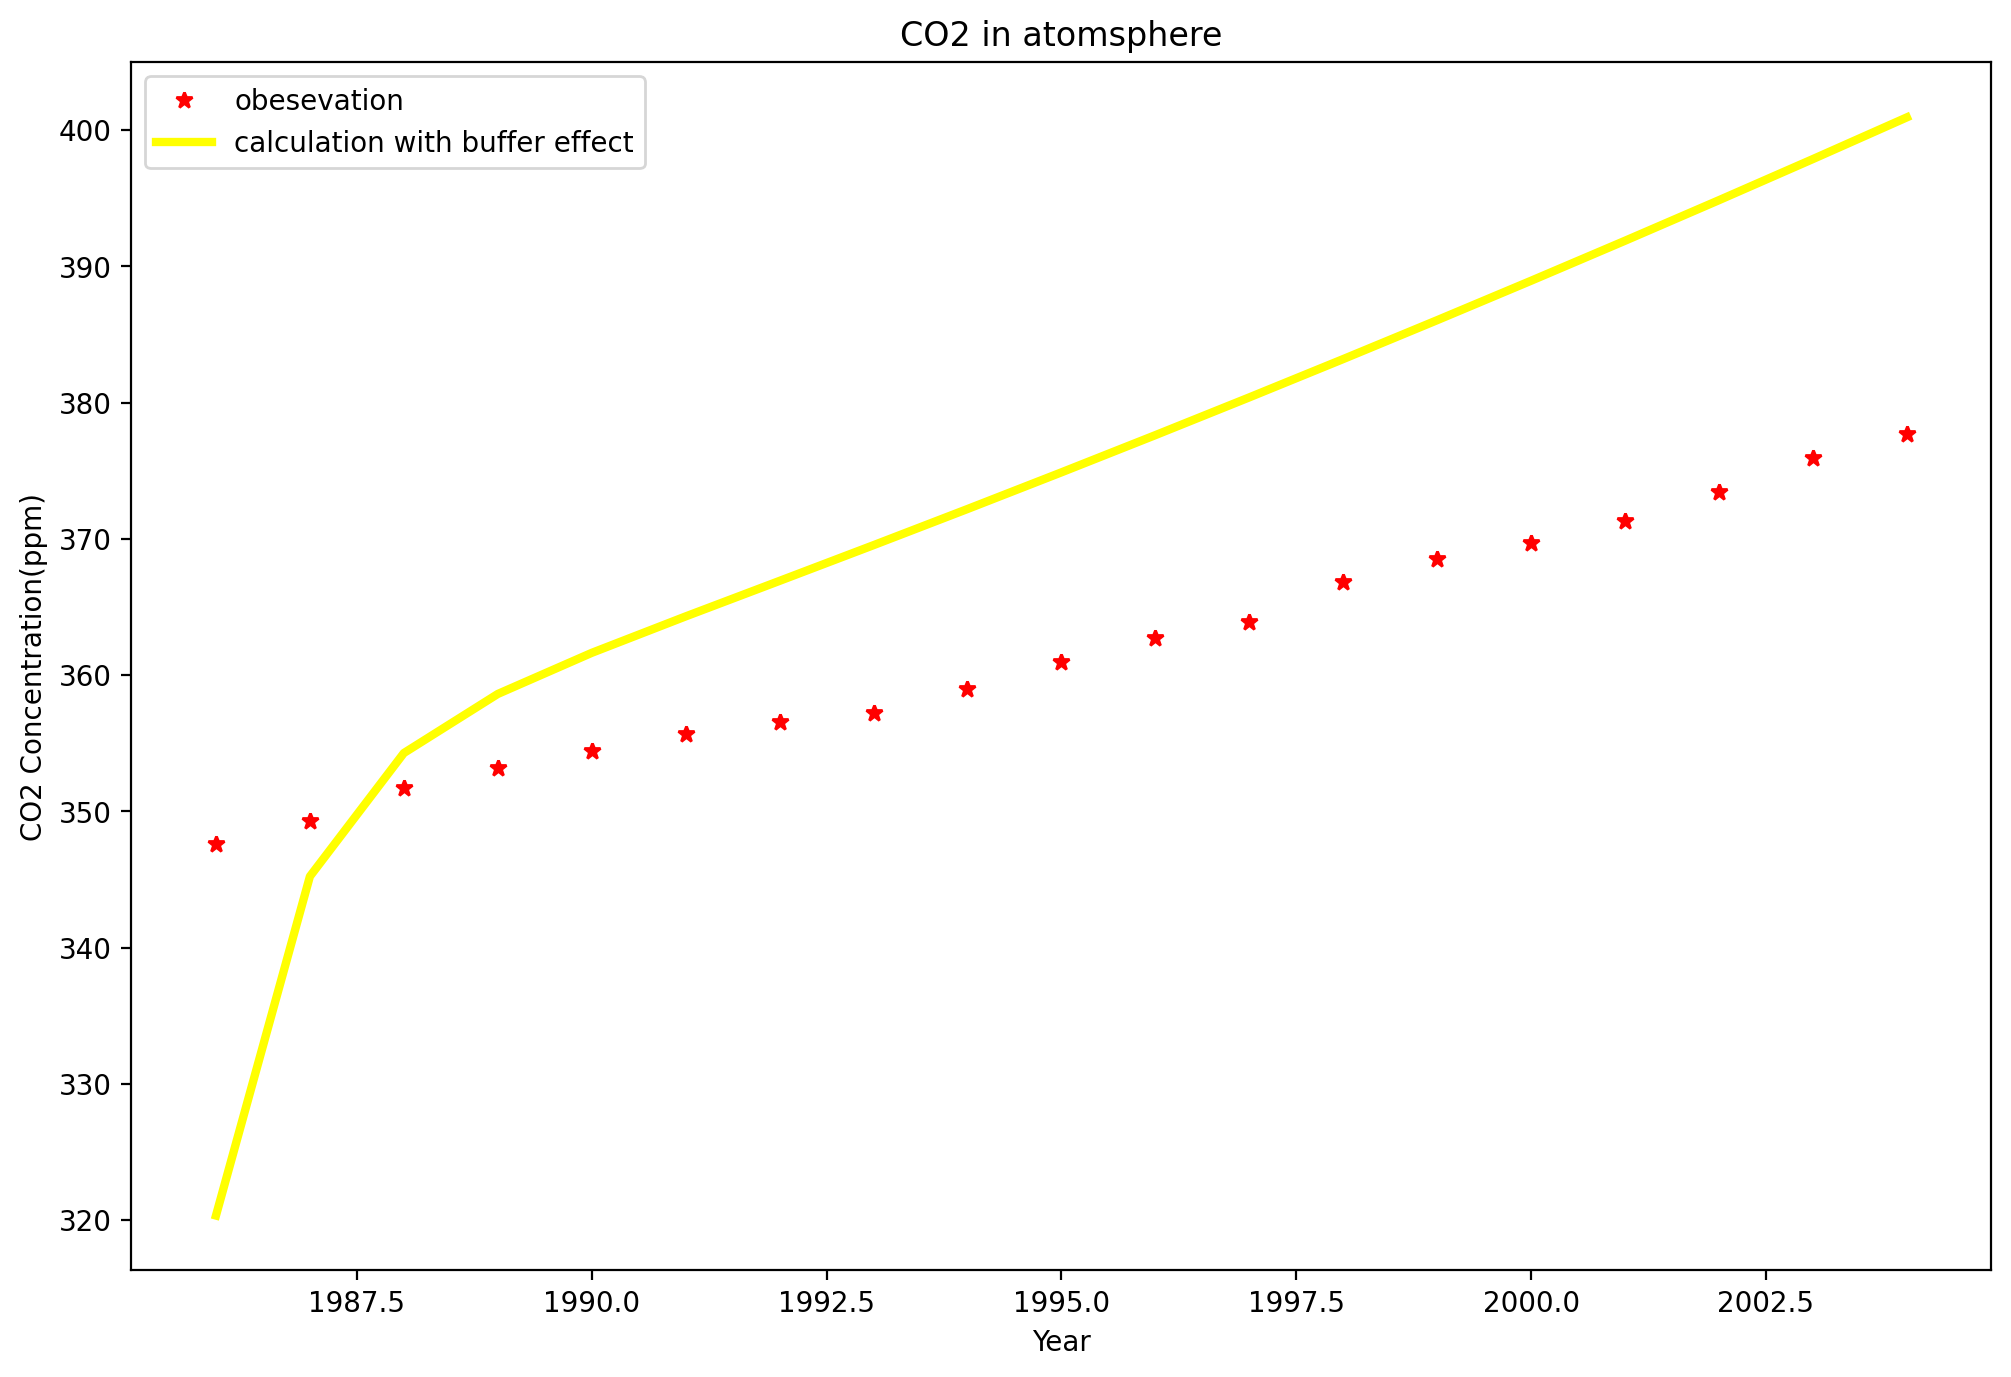

In [96]:
## Plot the results
plt.figure(figsize=(12,8),dpi=200)
plt.plot(total_co2["year"],total_co2["mean"],"r*",label="obesevation")
plt.plot(total_co2["year"],f_2[:,0],label="calculation with buffer effect",linewidth=3,color="yellow")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration(ppm)")
plt.legend(loc=2)
plt.title("CO2 in atomsphere")
plt.show()

## 1.3 Reproduce Figure2 in Tomizuka

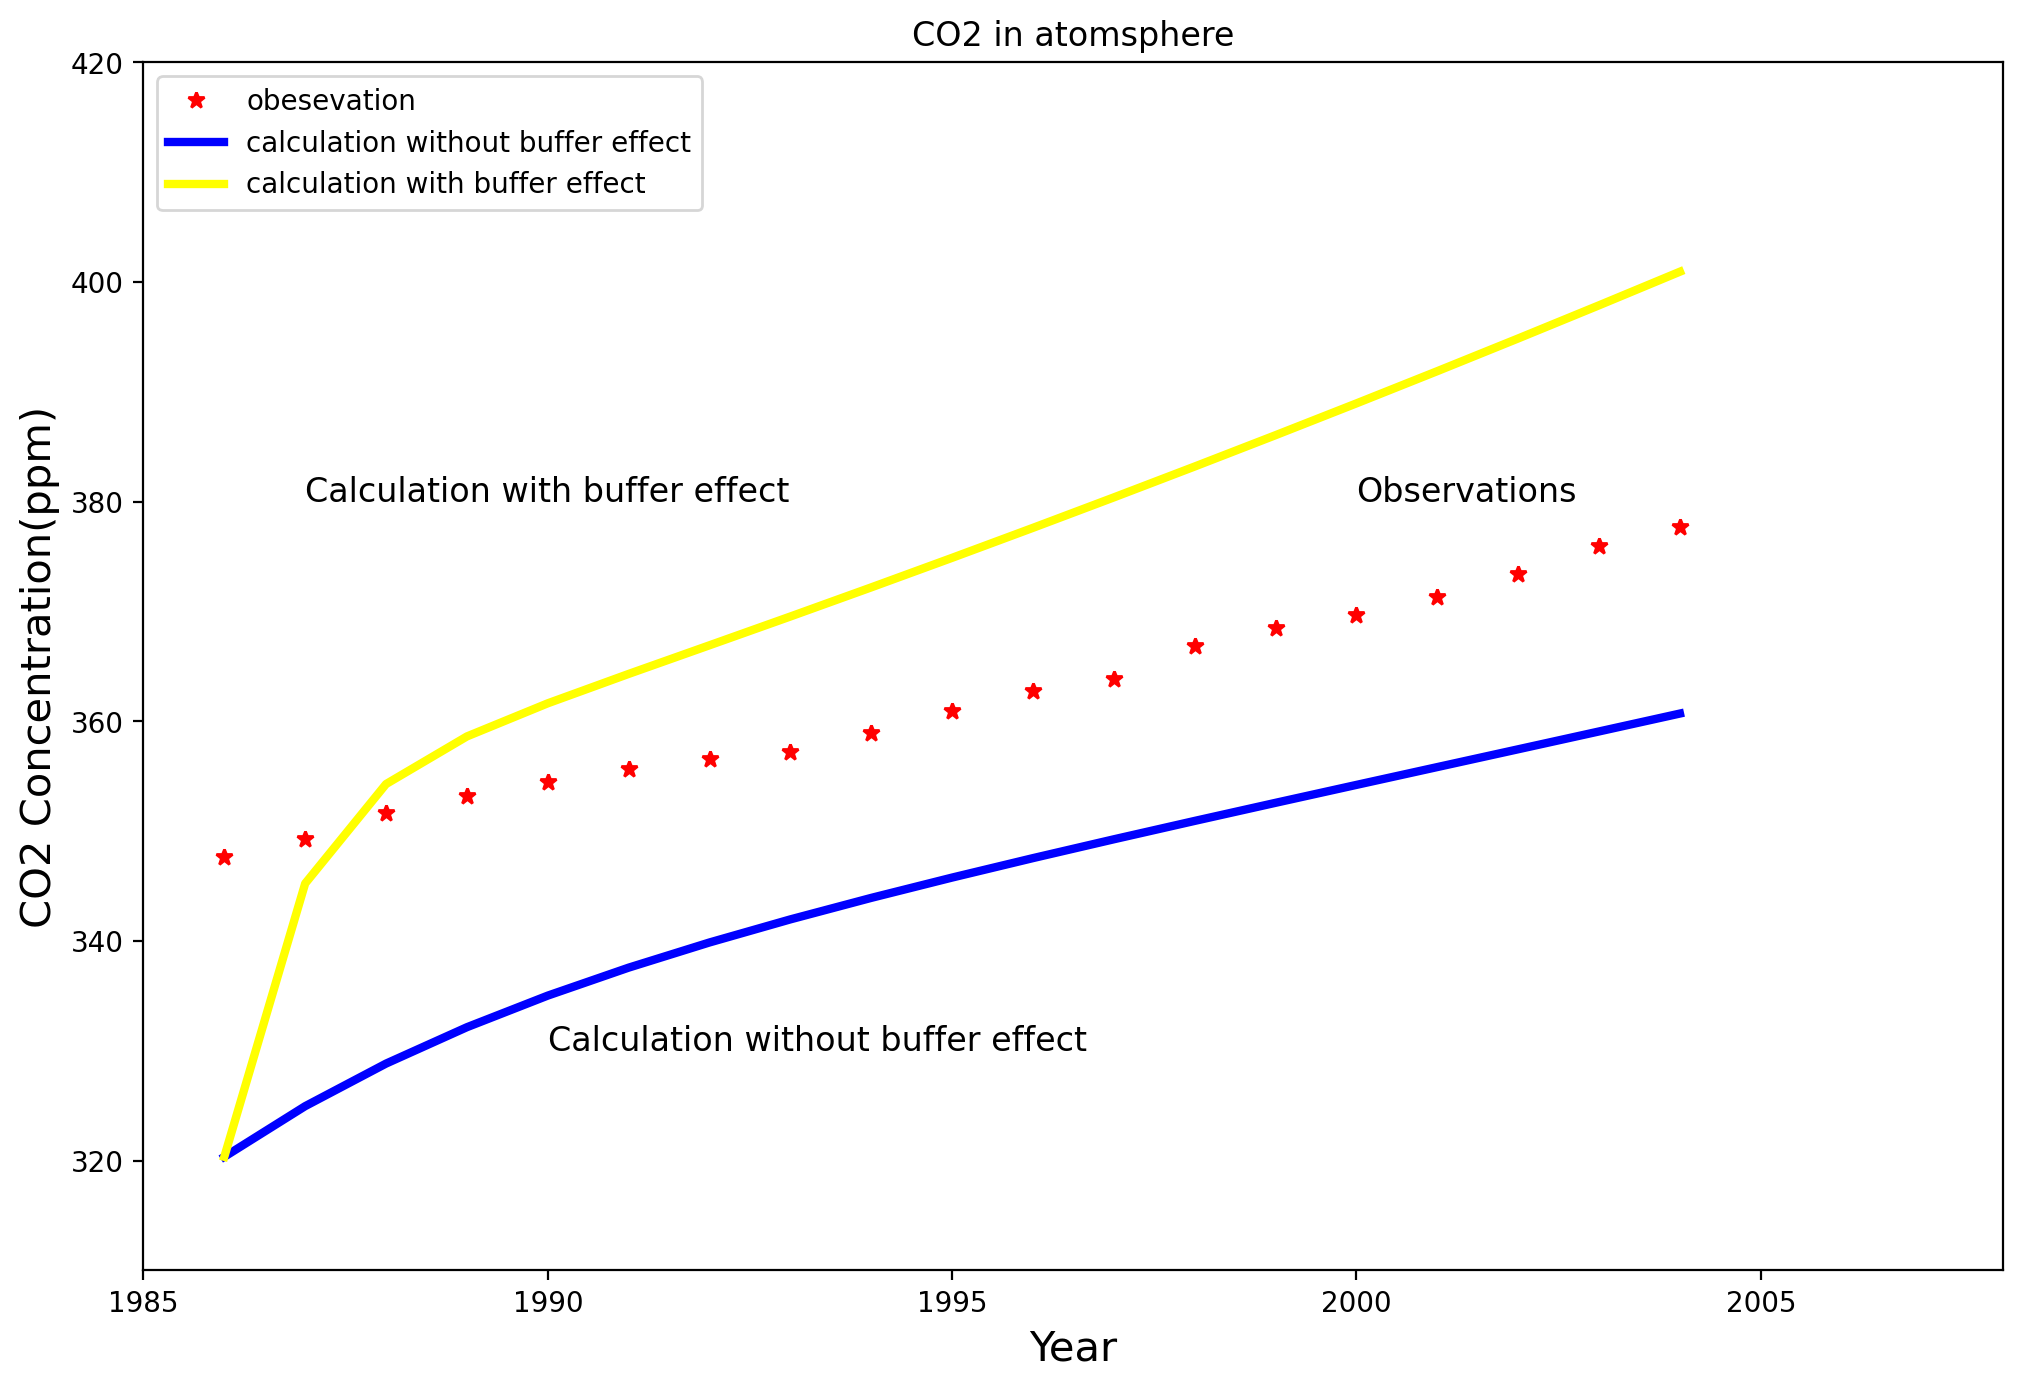

In [109]:
plt.figure(figsize=(12,8),dpi=200)
plt.plot(total_co2["year"],total_co2["mean"],"r*",label="obesevation")
plt.plot(total_co2["year"],f_1[:,0],label="calculation without buffer effect",linewidth=3,color="blue")
plt.plot(total_co2["year"],f_2[:,0],label="calculation with buffer effect",linewidth=3,color="yellow")
plt.xlabel("Year",fontsize=15)
plt.ylabel("CO2 Concentration(ppm)",fontsize=15)
plt.legend(loc=2)
plt.xlim(1985,2008)
plt.ylim(310,420)
plt.annotate("Calculation with buffer effect",(1987,380),fontsize=12)
plt.annotate("Calculation without buffer effect",(1990,330),fontsize=12)
plt.annotate("Observations",(2000,380),fontsize=12)
plt.title("CO2 in atomsphere")
plt.show()